In [213]:
import pandas as pd;
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt;

file_data = pd.read_csv('data.csv')
file_data.info()
file_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [214]:
file_data = file_data.drop(["id"], axis=1)
file_data = file_data.drop(["Unnamed: 32"], axis=1)
file_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [215]:
file_data.shape

(569, 31)

In [216]:
file_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [217]:
file_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [218]:
file_data.diagnosis = [1 if i == "M" else 0 for i in file_data.diagnosis]
file_data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


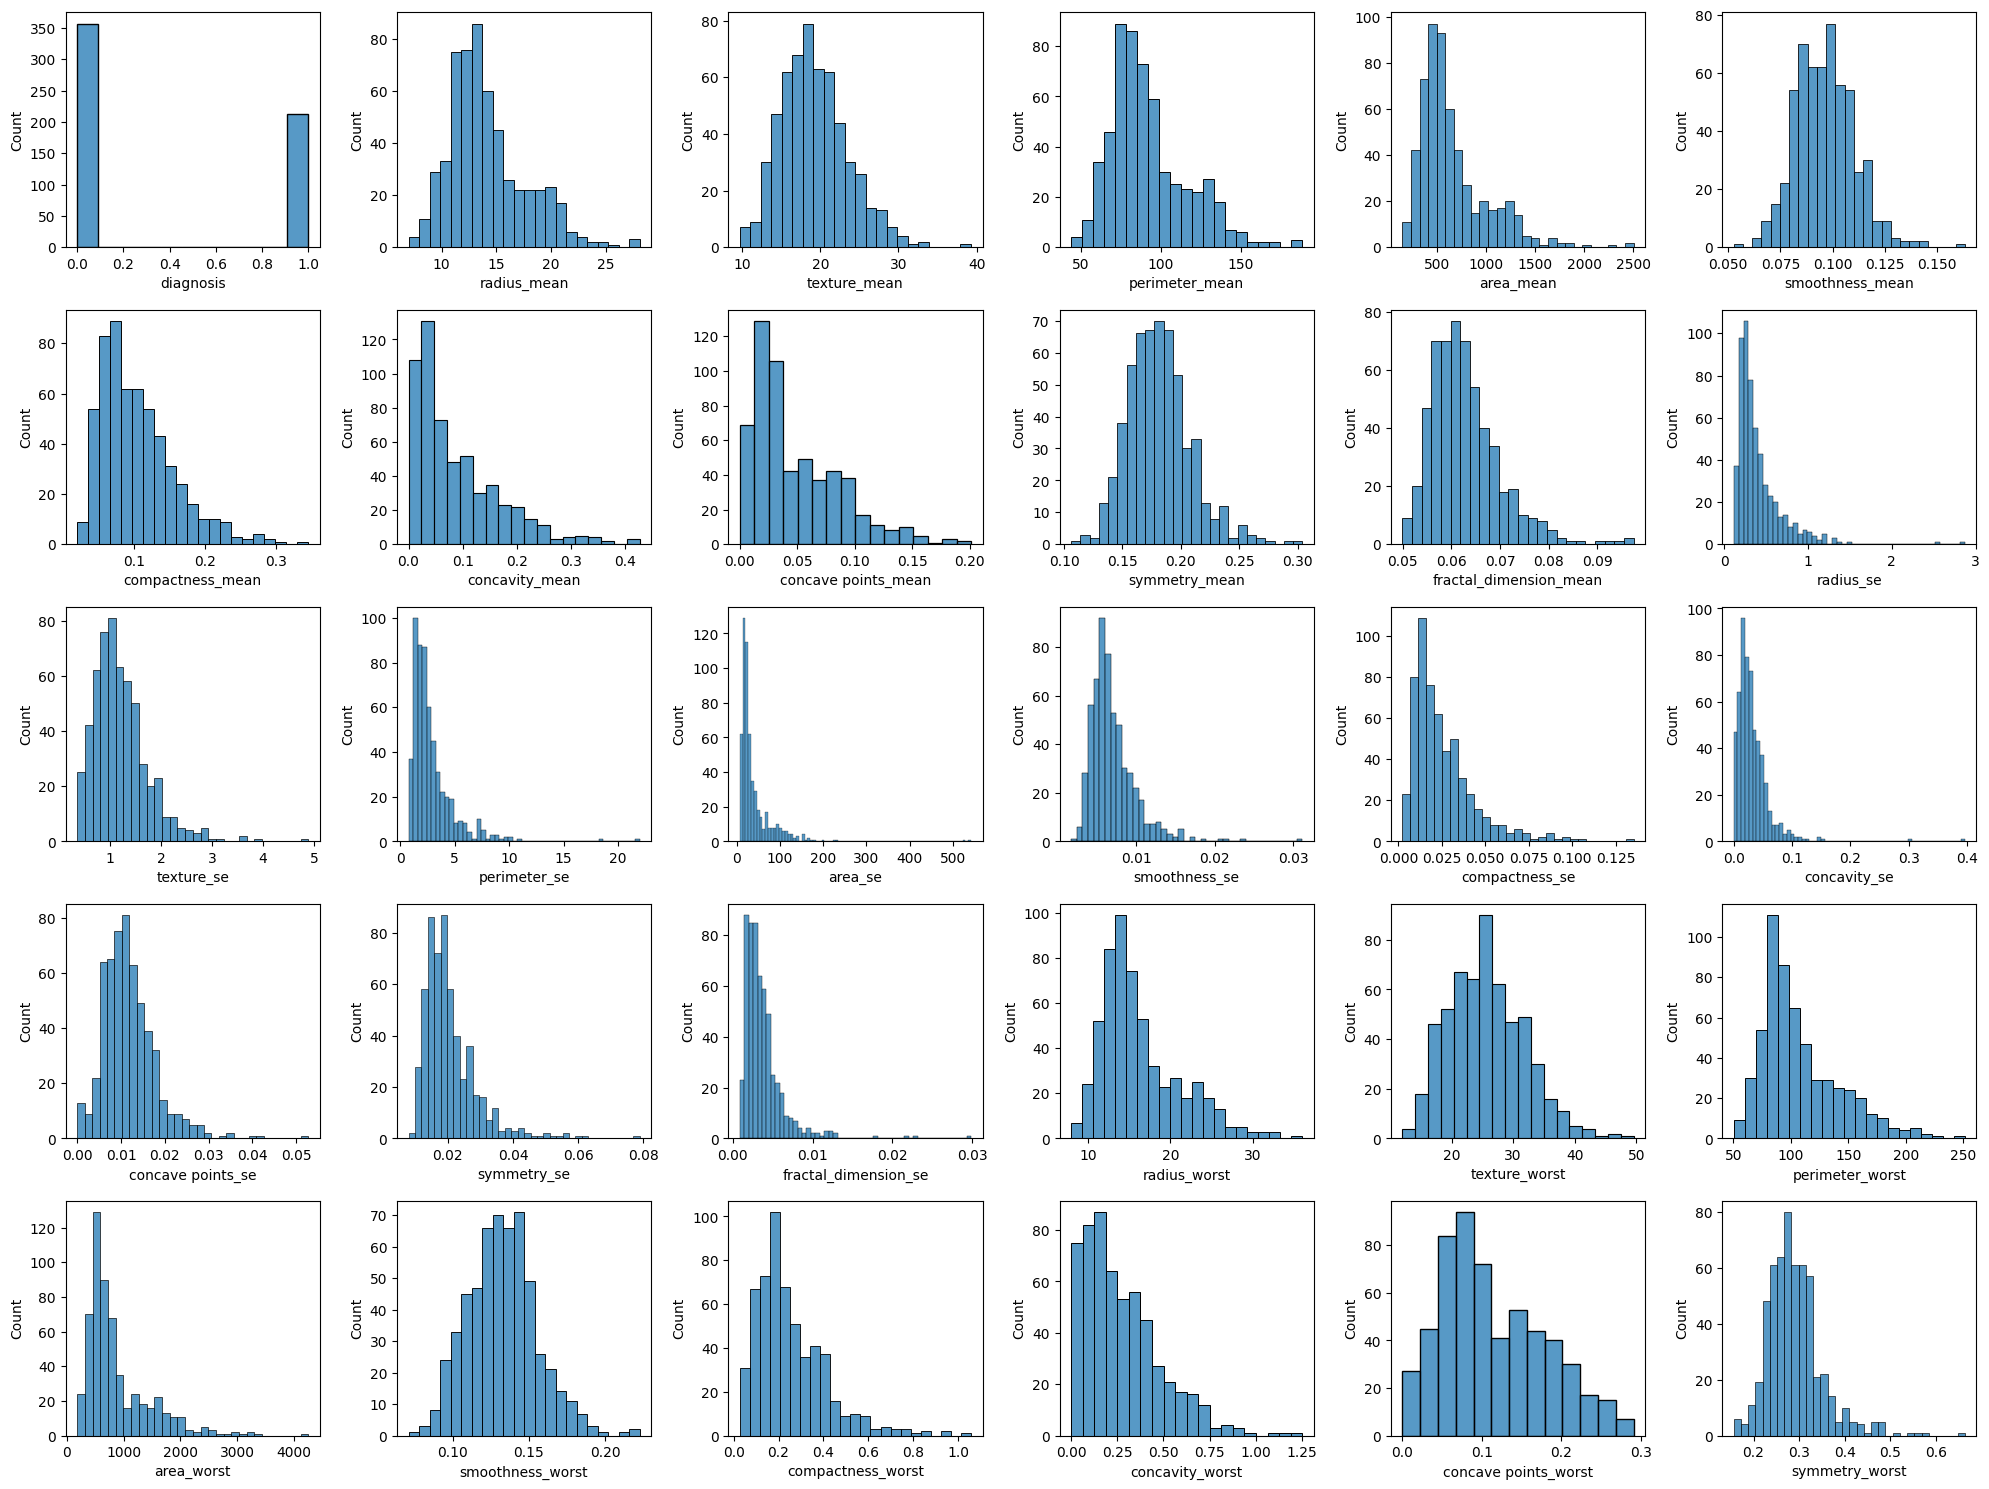

In [219]:
import seaborn as sns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in file_data:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(file_data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [220]:
mean_features = list(file_data.columns[1:11])
se_features = list(file_data.columns[11:21])
worst_features = list(file_data.columns[21:31])

mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

corr_mean_features = file_data[mean_features].corr()
corr_se_features = file_data[se_features].corr()
corr_worst_features = file_data[worst_features].corr()

In [221]:
corr_mean_features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [222]:
corr_se_features

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [223]:
corr_worst_features

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [224]:
# selecting features with more than 0.40

features_40 = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
               'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
               'smoothness_worst', 'compactness_worst',  'concavity_worst', 'concave points_worst', 'symmetry_worst']

features_60 = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
               'concavity_worst', 'concave points_worst']



x = file_data.drop(["diagnosis"], axis = 1)
y = file_data.diagnosis.values

In [225]:
from sklearn.feature_selection import SelectKBest

select_featuresKBest = SelectKBest(k=12)
getKBest = select_featuresKBest.fit(x, y)

dfscores = pd.DataFrame(getKBest.scores_)
dfcolumns = pd.DataFrame(x.columns)

featuresScore = pd.concat([dfcolumns, dfscores], axis=1)
featuresScore.columns = ['specs', 'score']

featuresScore


,specs,score
0,radius_mean,646.981021
1,texture_mean,118.096059
2,perimeter_mean,697.235272
3,area_mean,573.060747
4,smoothness_mean,83.651123
5,compactness_mean,313.233079
6,concavity_mean,533.793126
7,concave points_mean,861.676020
8,symmetry_mean,69.527444
9,fractal_dimension_mean,0.093459


In [267]:
print(featuresScore.nlargest(15, 'score'))

                   specs       score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586


In [268]:
features_best = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
                    'concavity_worst',  'compactness_mean', 'compactness_worst', 'radius_se', 'perimeter_se', 'area_se']

In [271]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
train_x_features = x_train[features_best]
test_x_features = x_test[features_best]
print("Train dataset shape: ", train_x_features.shape )
print("Test dataset shape: ", test_x_features.shape )


Train dataset shape:  (398, 15)
Test dataset shape:  (171, 15)


In [309]:
from sklearn.tree import DecisionTreeClassifier

dtScores = []

for i in range(1, 11):
    dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=i)
    dt.fit(train_x_features, y_train)
    dtScores.append(dt.score(test_x_features, y_test))

print(dtScores)



[0.847953216374269, 0.8713450292397661, 0.9239766081871345, 0.9298245614035088, 0.9122807017543859, 0.9064327485380117, 0.9239766081871345, 0.9181286549707602, 0.9239766081871345, 0.9122807017543859]


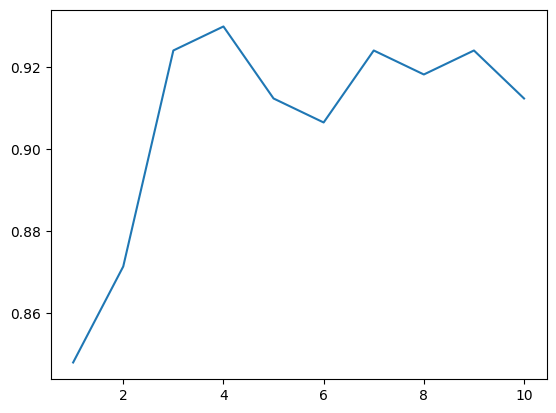

In [320]:
xpoints = [1,2,3,4,5,6,7,8,9,10]
ypoints = dtScores

plt.plot(xpoints, ypoints)
plt.show()

[Text(0.48863636363636365, 0.9, 'x[1] <= 104.1\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.22727272727272727, 0.7, 'x[0] <= 0.135\nentropy = 0.126\nsamples = 232\nvalue = [228, 4]'),
 Text(0.09090909090909091, 0.5, 'x[12] <= 0.643\nentropy = 0.042\nsamples = 222\nvalue = [221, 1]'),
 Text(0.045454545454545456, 0.3, 'entropy = 0.0\nsamples = 219\nvalue = [219, 0]'),
 Text(0.13636363636363635, 0.3, 'x[6] <= 12.265\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.18181818181818182, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.36363636363636365, 0.5, 'x[5] <= 739.0\nentropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.3181818181818182, 0.3, 'x[9] <= 0.831\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.36363636363636365, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4

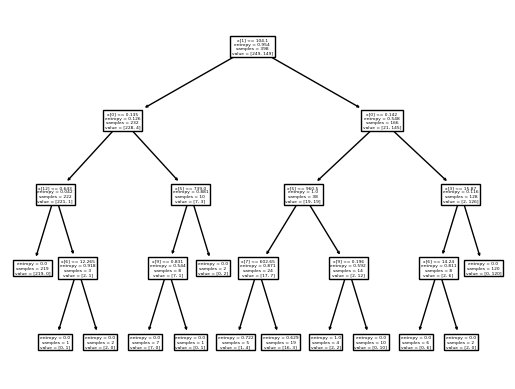

In [327]:
from sklearn import tree

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4)
dt.fit(train_x_features, y_train)

tree.plot_tree(dt)

In [335]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(train_x_features, y_train)
knn.score(test_x_features, y_test)

0.9298245614035088

In [330]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(train_x_features, y_train)
gbc.score(test_x_features, y_test)

0.9415204678362573

In [329]:
from sklearn.neural_network import MLPClassifier

nnmlp = MLPClassifier(solver='lbfgs', max_iter=200)
nnmlp.fit(train_x_features, y_train)
nnmlp.score(test_x_features, y_test)

c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.935672514619883

In [328]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1)
svm.fit(train_x_features, y_train)
svm.score(test_x_features, y_test)

0.935672514619883

In [336]:
model_params = {
    'neural networks': {
        'model': MLPClassifier(),
        'params' : {
            'solver':['lbfgs', 'sgd', 'adam'],
            'max_iter': [100, 200, 300, 400, 500]
        }
    },
    'boosting' : {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [5,10,30,50,100,150,200]
        }
    },
    'svm': {
        'model': SVC(),
        'params' : {
            'C': [1, 10, 20, 30],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'k-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,5,7,10,15,20]
        }
    }     
}

In [326]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(train_x_features, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
datagrid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
datagrid

c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Junior Quintana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_mu

,model,best_score,best_params
0,neural networks,0.944778,"{'max_iter': 200, 'solver': 'lbfgs'}"
1,boosting,0.939778,{'n_estimators': 50}
2,svm,0.947310,"{'C': 1, 'kernel': 'linear'}"
3,k-nearest neighbors,0.924620,{'n_neighbors': 10}
